In [1]:
#file upload
from google.colab import files
uploaded = files.upload()

Saving ionosphere_data.csv to ionosphere_data.csv


In [2]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import  to_categorical
from sklearn.preprocessing import scale, LabelEncoder

In [3]:
#load and read data file
data = pd.read_csv("ionosphere_data.csv")
data

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [4]:
data.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

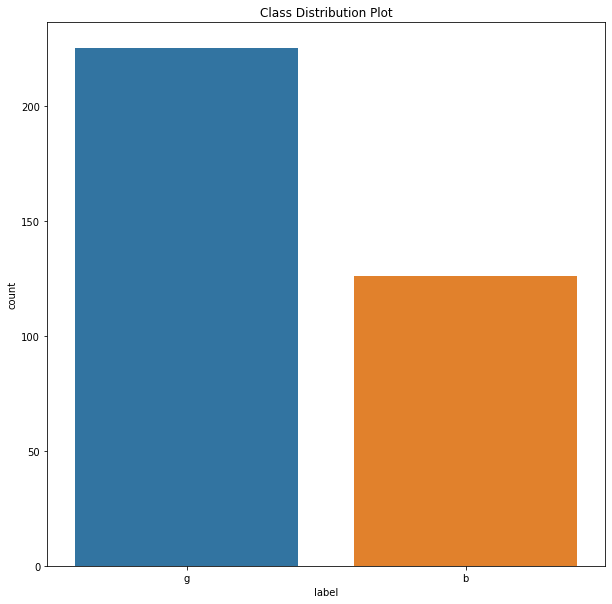

In [6]:
# Class Distribution Plot
plt.figure(figsize=(10,10))
plt.title("Class Distribution Plot")
sns.countplot(x='label', data=data)

In [8]:
# Droping Unecessary Columns
data = data.drop('feature2', axis=1)

In [9]:
data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [10]:
# One Hot Enconding Labels
encoding = {'g': 1, 'b': 0}
data.label.replace(encoding, inplace=True)

In [11]:
data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [12]:
# Shuffling Data
data = data.sample(frac = 1)
data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
231,1,0.94649,0.00892,0.97287,-0.00260,0.98922,0.00372,0.95801,0.01598,0.94054,0.03530,0.97213,0.04719,0.98625,0.01858,0.94277,0.07135,0.98551,-0.00706,0.97770,0.04980,0.96358,0.07098,0.93274,0.08101,0.95243,0.04356,0.97473,0.00818,0.97845,0.07061,1.00000,-0.00260,1
201,1,1.00000,-0.28428,1.00000,-0.25346,0.94623,-0.35094,1.00000,-0.30566,0.92736,-0.49057,0.90818,-0.44119,0.75723,-0.58899,0.69748,-0.58019,0.59623,-0.57579,0.68459,-0.70975,0.54465,-0.87327,0.49214,-0.73333,0.35504,-0.76054,0.26352,-0.78239,0.16604,-0.73145,0.13994,-0.70000,1
106,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.62195,1.00000,0.00000,0.00000,0.00000,0.00000,0.36585,-0.71951,0.56098,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
57,0,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-0.18750,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,-1.00000,0
176,1,0.00000,0.00000,-1.00000,-0.62766,1.00000,0.51064,0.07979,-0.23404,-1.00000,-0.36170,0.12766,-0.59043,1.00000,-1.00000,0.00000,0.00000,0.82979,-0.07979,-0.25000,1.00000,0.17021,-0.70745,0.00000,0.00000,-0.19149,-0.46809,-0.22340,-0.48936,0.74468,0.90426,-0.67553,0.45745,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.21429,-0.09524,0.33333,0.07143,0.19048,0.19048,0.23810,0.09524,0.40476,0.02381,0.30952,-0.04762,0.30952,-0.04762,0.28571,-0.11905,0.33333,0.04762,0.30952,0.00000,0.21429,-0.11905,0.35714,-0.04762,0.22109,-0.02290,0.19048,0.00000,0.16997,-0.02034,0.14694,-0.01877,1
68,1,1.00000,0.67784,0.81309,0.82021,0.43019,1.00000,0.20619,0.80541,-0.43872,1.00000,-0.79135,0.77092,-1.00000,0.40268,-0.39046,-0.58634,-0.97907,-0.42822,-0.73083,-0.76339,-0.37671,-0.97491,0.41366,-1.00000,0.41778,-0.93296,0.25773,-1.00000,0.93570,-0.35222,0.98816,0.03446,1
238,1,0.06404,-0.15271,-0.04433,0.05911,0.08374,-0.02463,-0.01478,0.18719,0.06404,0.00000,0.12315,-0.09852,0.05911,0.00000,0.01970,-0.02956,-0.12808,-0.20690,0.06897,0.01478,0.06897,0.02956,0.07882,0.16256,0.28079,-0.04926,-0.05911,-0.09360,0.04433,0.05419,0.07389,-0.10837,0
128,1,0.00000,0.00000,-0.33672,0.85388,0.00000,0.00000,0.68869,-1.00000,0.97078,0.31385,-0.26048,-0.59212,-0.30241,0.65565,0.94155,0.16391,0.00000,0.00000,0.00000,0.00000,-0.18043,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,0.04447,0.61881,0.00000,0.00000,0


In [14]:
# Splitting The Dataset Into Training And Testing Data

# Training Data
train_data = data.iloc[:211,:]
train_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
231,1,0.94649,0.00892,0.97287,-0.00260,0.98922,0.00372,0.95801,0.01598,0.94054,0.03530,0.97213,0.04719,0.98625,0.01858,0.94277,0.07135,0.98551,-0.00706,0.97770,0.04980,0.96358,0.07098,0.93274,0.08101,0.95243,0.04356,0.97473,0.00818,0.97845,0.07061,1.00000,-0.00260,1
201,1,1.00000,-0.28428,1.00000,-0.25346,0.94623,-0.35094,1.00000,-0.30566,0.92736,-0.49057,0.90818,-0.44119,0.75723,-0.58899,0.69748,-0.58019,0.59623,-0.57579,0.68459,-0.70975,0.54465,-0.87327,0.49214,-0.73333,0.35504,-0.76054,0.26352,-0.78239,0.16604,-0.73145,0.13994,-0.70000,1
106,1,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.62195,1.00000,0.00000,0.00000,0.00000,0.00000,0.36585,-0.71951,0.56098,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
57,0,-1.00000,1.00000,1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,-1.00000,-0.18750,1.00000,1.00000,-1.00000,-1.00000,1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,-1.00000,0
176,1,0.00000,0.00000,-1.00000,-0.62766,1.00000,0.51064,0.07979,-0.23404,-1.00000,-0.36170,0.12766,-0.59043,1.00000,-1.00000,0.00000,0.00000,0.82979,-0.07979,-0.25000,1.00000,0.17021,-0.70745,0.00000,0.00000,-0.19149,-0.46809,-0.22340,-0.48936,0.74468,0.90426,-0.67553,0.45745,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,1,0.50000,0.00000,0.38696,0.10435,0.49130,0.06522,0.46957,-0.03913,0.35652,-0.12609,0.45652,0.04783,0.50435,0.02609,0.35652,0.19565,0.42174,0.14783,0.42174,-0.02609,0.32174,-0.11304,0.47391,-0.00870,0.41789,0.06908,0.38696,0.03913,0.35217,0.14783,0.44783,0.17391,1
338,1,0.32789,0.11042,0.15970,0.29308,0.14020,0.74485,-0.25131,0.91993,-0.16503,0.26664,-0.63714,0.24865,-0.97650,-0.00337,-0.23227,-0.19909,-0.30522,-0.48886,-0.14426,-0.89991,0.09345,-0.28916,0.28307,-0.18560,0.39599,-0.11498,0.31005,0.05614,0.21443,0.20540,0.13376,0.26422,1
222,0,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,1.00000,-1.00000,1.00000,1.00000,0
23,0,-1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,-1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,-1.00000,-1.00000,1.00000,-1.00000,1.00000,1.00000,-1.00000,1.00000,0.00000,0.00000,0


In [16]:
# Testing Data
test_data = data.iloc[211:,:]
test_data

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
303,1,0.94052,-0.01531,0.94170,0.01001,0.94994,-0.01472,0.95878,-0.01060,0.94641,-0.03710,0.97173,-0.01767,0.97055,-0.03887,0.95465,-0.04064,0.95230,-0.04711,0.94229,-0.02179,0.92815,-0.04417,0.92049,-0.04476,0.92695,-0.05827,0.90342,-0.07479,0.91991,-0.07244,0.92049,-0.07420,1
64,1,1.00000,-0.41457,1.00000,0.76131,0.87060,0.18593,1.00000,-0.09925,0.93844,0.47990,0.65452,-0.16080,1.00000,0.00879,0.97613,-0.50126,0.80025,-0.24497,0.88065,-0.19095,1.00000,-0.12312,0.93593,0.10678,0.92890,-0.07249,1.00000,-0.27387,0.43970,0.19849,0.51382,-0.05402,1
166,1,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,1.00000,1.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,0.43750,1.00000,-1.00000,0.00000,0.00000,-1.00000,-1.00000,-1.00000,1.00000,0
28,1,1.00000,0.08380,1.00000,0.17387,1.00000,-0.13308,0.98172,0.64520,1.00000,0.47904,1.00000,0.59113,1.00000,0.70758,1.00000,0.82777,1.00000,0.95099,1.00000,1.00000,0.98042,1.00000,0.91624,1.00000,0.83899,1.00000,0.74822,1.00000,0.64358,1.00000,0.52479,1.00000,1
47,1,0.94598,-0.02685,-1.00000,0.26131,-0.36393,0.35639,0.69258,-0.63427,1.00000,-0.03353,-0.29020,-0.00550,-0.54852,0.15452,0.91921,-0.46270,1.00000,-0.50424,-0.29735,-0.31454,-0.73864,0.37361,0.83872,-0.46734,0.52208,-0.58130,1.00000,-0.61393,-0.09634,0.20477,-0.06117,0.41913,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0.21429,-0.09524,0.33333,0.07143,0.19048,0.19048,0.23810,0.09524,0.40476,0.02381,0.30952,-0.04762,0.30952,-0.04762,0.28571,-0.11905,0.33333,0.04762,0.30952,0.00000,0.21429,-0.11905,0.35714,-0.04762,0.22109,-0.02290,0.19048,0.00000,0.16997,-0.02034,0.14694,-0.01877,1
68,1,1.00000,0.67784,0.81309,0.82021,0.43019,1.00000,0.20619,0.80541,-0.43872,1.00000,-0.79135,0.77092,-1.00000,0.40268,-0.39046,-0.58634,-0.97907,-0.42822,-0.73083,-0.76339,-0.37671,-0.97491,0.41366,-1.00000,0.41778,-0.93296,0.25773,-1.00000,0.93570,-0.35222,0.98816,0.03446,1
238,1,0.06404,-0.15271,-0.04433,0.05911,0.08374,-0.02463,-0.01478,0.18719,0.06404,0.00000,0.12315,-0.09852,0.05911,0.00000,0.01970,-0.02956,-0.12808,-0.20690,0.06897,0.01478,0.06897,0.02956,0.07882,0.16256,0.28079,-0.04926,-0.05911,-0.09360,0.04433,0.05419,0.07389,-0.10837,0
128,1,0.00000,0.00000,-0.33672,0.85388,0.00000,0.00000,0.68869,-1.00000,0.97078,0.31385,-0.26048,-0.59212,-0.30241,0.65565,0.94155,0.16391,0.00000,0.00000,0.00000,0.00000,-0.18043,-1.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,0.04447,0.61881,0.00000,0.00000,0


In [17]:

# Dropping Labels From Training And Testing Data

# Train Labels
train_labels = train_data.pop('label')
train_labels

231    1
201    1
106    0
57     0
176    0
      ..
260    1
338    1
222    0
23     0
285    1
Name: label, Length: 211, dtype: int64

In [18]:
# Test Labels
test_labels = test_data.pop('label')
test_labels

303    1
64     1
166    0
28     1
47     0
      ..
115    1
68     1
238    0
128    0
348    1
Name: label, Length: 140, dtype: int64

In [19]:
# Standardizing Training And Testing Data
from sklearn.preprocessing import StandardScaler
train_data = StandardScaler().fit_transform(train_data)
train_data

array([[ 0.35824886,  0.6084241 , -0.08474882, ...,  0.12639769,
         1.21277381, -0.08117931],
       [ 0.35824886,  0.71294599, -0.71907255, ..., -1.40726412,
        -0.39827105, -1.60582365],
       [ 0.35824886, -1.24036899, -0.1040468 , ..., -0.00861946,
        -0.66040348, -0.07549523],
       ...,
       [-2.7913557 ,  0.71294599, -2.26749745, ..., -1.92077294,
         1.21277381,  2.11068821],
       [-2.7913557 , -3.19368396,  2.05940385, ...,  1.90353402,
        -0.66040348, -0.07549523],
       [ 0.35824886, -0.09848059, -0.87263428, ..., -0.24224637,
         0.1781618 , -0.30086889]])

In [20]:
test_data = StandardScaler().fit_transform(test_data)
test_data

array([[ 0.33333333,  0.61179249, -0.13307738, ..., -0.11296397,
         1.14419321, -0.12150027],
       [ 0.33333333,  0.73743316, -1.11567211, ...,  0.43224819,
         0.33628164, -0.07955755],
       [ 0.33333333, -1.37488488, -0.09539887, ..., -1.97956049,
        -2.67115115,  2.1111492 ],
       ...,
       [ 0.33333333, -1.23961203, -0.47122425, ...,  0.1418628 ,
        -0.53770596, -0.19252022],
       [ 0.33333333, -1.37488488, -0.09539887, ...,  1.27808873,
        -0.68449964,  0.03271924],
       [ 0.33333333,  0.62550143, -0.09623562, ...,  0.041707  ,
         1.15706671,  0.0207267 ]])

In [22]:
nfeatures = train_data.shape[1]
nfeatures

33

In [23]:
# Making Base Model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape = (nfeatures,)))
model.add(Dropout(0.2))
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [26]:
# Compilation Step
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                544       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                204       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 88        
_________________________________________________________________
dropout_2 (Dropout)          (None, 8)                 0

In [27]:

# Fitting Model On 100 Epochs
history = model.fit(train_data, train_labels, epochs = 10, batch_size = 8)

Epoch 1/10
27/27 [==============================] - 1s 2ms/step - loss: 0.5060 - accuracy: 0.8229
Epoch 2/10
27/27 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8412
Epoch 3/10
27/27 [==============================] - 0s 1ms/step - loss: 0.4032 - accuracy: 0.8678
Epoch 4/10
27/27 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8627
Epoch 5/10
27/27 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8766
Epoch 6/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3640 - accuracy: 0.8848
Epoch 7/10
27/27 [==============================] - 0s 2ms/step - loss: 0.3356 - accuracy: 0.9044
Epoch 8/10
27/27 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.9054
Epoch 9/10
27/27 [==============================] - 0s 1ms/step - loss: 0.2827 - accuracy: 0.9172
Epoch 10/10
27/27 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.9133


In [30]:

# Feeding History In A DataFrame
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,accuracy,epoch
5,0.384638,0.876777,5
6,0.345750,0.881517,6
7,0.299280,0.914692,7
8,0.291535,0.914692,8
9,0.298722,0.905213,9


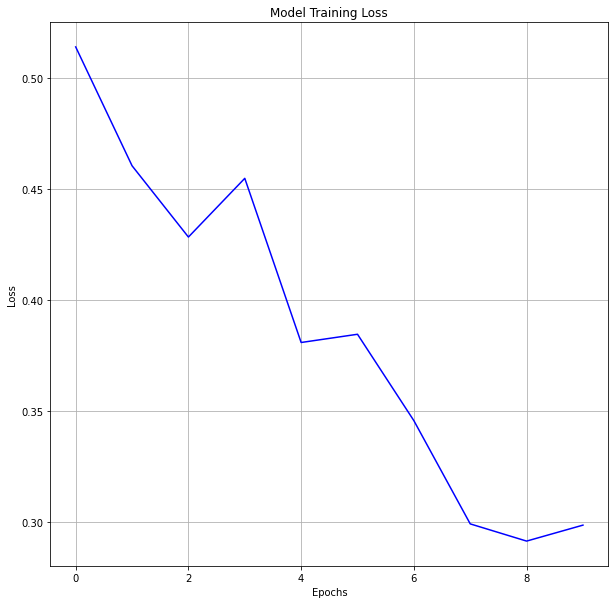

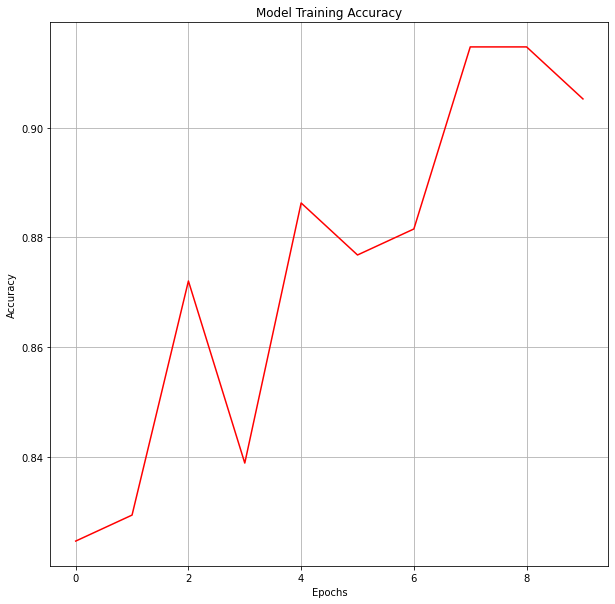

In [31]:
# Plotting Loss And Accuracy
plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Training Loss")
plt.plot(history_df['epoch'], history_df['loss'], color = 'blue')
plt.grid()

plt.figure(figsize=(10,10))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Training Accuracy")
plt.plot(history_df['epoch'], history_df['accuracy'], color = 'red')
plt.grid()
plt.show()

In [32]:
# Making Predictions On Test Data
predictions = model.predict(test_data)
predictions[:10]

array([[0.8860208 ],
       [0.849692  ],
       [0.00214687],
       [0.8788557 ],
       [0.0417307 ],
       [0.8567325 ],
       [0.8435034 ],
       [0.9259822 ],
       [0.875651  ],
       [0.00316998]], dtype=float32)

In [33]:
# Testing Model On Test Data
testing = model.evaluate(test_data, test_labels)
testing

5/5 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9286


[0.24334782361984253, 0.9285714030265808]

In [34]:
# Making Classification Report
from sklearn.metrics import classification_report
model_classification_report = classification_report(test_labels, predictions.round(), output_dict=True)

In [35]:
classification_report_df = pd.DataFrame(model_classification_report)
classification_report_df

,0,1,accuracy,macro avg,weighted avg
precision,0.916667,0.934783,0.928571,0.925725,0.928313
recall,0.880000,0.955556,0.928571,0.917778,0.928571
f1-score,0.897959,0.945055,0.928571,0.921507,0.928235
support,50.000000,90.000000,0.928571,140.000000,140.000000


In [36]:
# Testing Loss And Testing Accuracy
print(f"Testing Loss: {testing[0]}")
print(f"Testing Accuracy: {testing[1]}")

Testing Loss: 0.24334782361984253
Testing Accuracy: 0.9285714030265808
